## Section Property

### Geometry

| Symbol | Description | Unit |
| ----------- | ----------- | ----------- |
| h | Depth | mm |
| tw | Width | mm |
| tw | Web thickness  | mm |
| tf | Flange thickness                 | mm |
| hi | Inner depth between flanges      | mm |
| r1 | Root fillet radius               | mm |
| d  | Depth of straight portion of web | mm |
| k  | Distance                         | mm |

### Sectional Area

| Symbol | Description | Unit |
| ----------- | ----------- | ----------- |
| A | Sectional Area | cm^2 |

### Bending

| Symbol | Description | Unit |
| ----------- | ----------- | ----------- |
| Iy | Area moment of inertia about y-axis      | cm4 |
| Iz | Area moment of inertia about z-axis      | cm4 |
| Ip | Polar area moment of inertia             | cm4 |
| iy | Radius of gyration about y-axis          | mm |
| iz | Radius of gyration about z-axis          | mm |
| ip | Polar radius of gyration                 | mm |
| Sy | Statical moment of area about y-axis max | cm3 |
| Sz | Statical moment of area about z-axis max | cm3 |
| Wy | Elastic section modulus about y-axis     | cm3 |
| Wz | Elastic section modulus about z-axis     | cm3 |

### Shear

| Symbol | Description | Unit |
| ----------- | ----------- | ----------- |
| Ay | Shear area in y-direction | cm2 |
| Az | Shear area in z-direction | cm2 |

### Torsion

| Symbol | Description | Unit |
| ----------- | ----------- | ----------- |
| It   | Torsional constant           | cm4 |
| It,s | Secondary torsional constant | cm4 |
| Wt   | Section modulus for torsion  | cm3 |

### Warping

| Symbol | Description | Unit |
| ----------- | ----------- | ----------- |
| maxω  | Warping ordinate with respect to shear center           | cm2 |
| Iω    | Warping constant with respect to shear center           | cm6 |
| iω    | Warping radius of gyration with respect to shear center | mm  |
| Wω    | Warping section modulus with respect to shear center    | cm4 |
| maxSω | Warping statical moment with respect to shear center    | cm4 |

### Plasticity

| Symbol | Description | Unit |
| ----------- | ----------- | ----------- |
| Wpl,y | Plastic section modulus about y-axis                         | cm3 |
| Wpl,z | Plastic section modulus about z-axis                         | cm3 |
| Wpl,ω | Plastic warping section modulus with respect to shear center | cm4 |
| αpl,y | Plastic shape factor about y-axis                            | -- |
| αpl,z | Plastic shape factor about z-axis                            | -- |
| αpl,ω | Plastic shape factor with respect to shear center            | -- |
| Apl,y | Plastic shear area in y-direction                            | cm2 |
| Apl,z | Plastic shear area in z-direction                            | cm2 |
| Npl   | Plastic limiting normal force                                | kN |
| Vpl,y | Plastic limiting shear force in y-direction                  | kN |
| Vpl,z | Plastic limiting shear force in z-direction                  | kN |
| Mpl,y | Plastic limiting bending moment about y-axis                 | kNm |
| Mpl,z | Plastic limiting bending moment about z-axis                 | kNm |

### Other

| Symbol | Description | Unit |
| ----------- | ----------- | ----------- |
| G    | Weight                      | kg/m  |
| Am   | Surface area per unit length| m2/m  |
| V    | Volume                      | cm3/m |
| Am/V | Section factor              | 1/m  |
| Aw   | Web area                    | cm2 |
| w    | Flange hole spacing         | mm |

In [12]:
import pandas as pd

In [13]:
def get_Series(df : pd.DataFrame, Column : str, Parameter : str) -> pd.Series:
    """DataFrame içerisinde verilen parametreyi ilgili kolonda bulur ve o satır bilgilerini pandas.Series olarak getirir.

    Args:
        df (pd.DataFrame): Dataların bilgisi
        Column (str): Kolon bilgisi
        Parameter (str): Aranacak parametre

    Returns:
        pd.Series: Aranan parametrenin bulunduğu satır bilgisi
    
    Example:
        >>sec = get_Series(df=df1,Column="AISC_Manual_Label.1",SectionName="W1100X499")\n
        >>sec
          Type                           W\n
          AISC_Manual_Label        W44X335\n
          AISC_Manual_Label.1    W1100X499\n
          W                          499.0\n
          A                          63500\n
                                  ...    
          PC                          2640\n
          PD                          3050\n
          T                            965\n
          WGi                          140\n
          WGo                            –\n
          Name: 0, Length: 83, dtype: object
    """
    Index = df[df[Column] == Parameter].index[0]
    return df.loc[Index]


In [14]:
description = pd.read_excel(".\\aisc-shapes-database-v15.0.xlsx",sheet_name="description")
description.dropna(inplace=True)
description.head(84)

FileNotFoundError: [Errno 2] No such file or directory: '.\\aisc-shapes-database-v15.0.xlsx'

In [ ]:
get_Series(description,"Variable","ID")

Variable                                                    ID
Descriptiona    Inside diameter of round HSS or pipe, in. (mm)
Name: 30, dtype: object

In [ ]:
df1 = pd.read_excel(".\\aisc-shapes-database-v15.0.xlsx",sheet_name="Database v15.0")
df1.head()

,Type,AISC_Manual_Label,AISC_Manual_Label.1,W,A,d,ddet,Ht,h,OD,...,rts,ho,PA,PA2,PB,PC,PD,T,WGi,WGo
0,W,W44X335,W1100X499,499.0,63500,1120,1120,–,–,–,...,108,1070,3350,–,3760,2640,3050,965,140,–
1,W,W44X290,W1100X433,433.0,55100,1110,1110,–,–,–,...,107,1070,3330,–,3730,2620,3020,965,140,–
2,W,W44X262,W1100X390,390.0,49800,1100,1100,–,–,–,...,106,1060,3330,–,3730,2590,3000,965,140,–
3,W,W44X230,W1100X343,343.0,43700,1090,1090,–,–,–,...,105,1060,3300,–,3710,2590,3000,965,140,–
4,W,W40X655,W1000X976,975.0,125000,1110,1110,–,–,–,...,120,1020,3350,–,3780,2640,3070,864,191,–


In [ ]:
df1.iloc[:,9:35]

,OD,bf,bfdet,B,b,ID,tw,twdet,twdet/2,tf,...,k1,x,y,eo,xp,yp,bf/2tf,b/t,b/tdes,h/tw
0,–,404,406,–,–,–,26.2,25.4,12.7,45,...,44.5,–,–,–,–,–,4.5,–,–,38
1,–,401,403,–,–,–,22,22.2,11.1,40.1,...,41.3,–,–,–,–,–,5.02,–,–,45
2,–,401,400,–,–,–,19.9,20.6,11.1,36.1,...,41.3,–,–,–,–,–,5.57,–,–,49.6
3,–,401,400,–,–,–,18,17.5,9.52,31,...,39.7,–,–,–,–,–,6.45,–,–,54.8
4,–,429,429,–,–,–,50,50.8,25.4,89.9,...,55.6,–,–,–,–,–,2.39,–,–,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,141.3,–,–,–,–,103,–,–,–,–,...,–,–,–,–,–,–,–,–,–,–
2087,114.3,–,–,–,–,80.1,–,–,–,–,...,–,–,–,–,–,–,–,–,–,–
2088,88.9,–,–,–,–,58.4,–,–,–,–,...,–,–,–,–,–,–,–,–,–,–
2089,73,–,–,–,–,45,–,–,–,–,...,–,–,–,–,–,–,–,–,–,–


In [ ]:
sec = get_Series(df1,"AISC_Manual_Label.1","W1100X499")
sec

Type                           W
AISC_Manual_Label        W44X335
AISC_Manual_Label.1    W1100X499
W                          499.0
A                          63500
                         ...    
PC                          2640
PD                          3050
T                            965
WGi                          140
WGo                            –
Name: 0, Length: 83, dtype: object

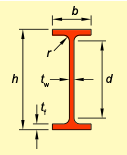 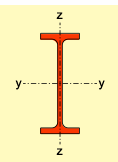

In [ ]:
HE = pd.read_excel("D:\\github\\SteelDesign\\SteelSections\\HE-secpropsdimsprops-Eurocode3-UK-25_10_2023.xlsx",sheet_name="HE")
HE

,Section,G,h,b,tw,tf,r,d,C,N,...,Iz,iy,iz,Wey,Wez,Wpy,Wpz,Iw,IT,A
0,Name,kg/m,mm,mm,mm,mm,mm,mm,mm,mm,...,cm4,cm,cm,cm3,cm3,cm3,cm3,dm6,cm4,cm2
1,HE 1000 x 584,584,"1,056.0",314.0,36.0,64.0,30.0,868.0,20,150,...,"33,400",40.9,6.70,"23,600","2,130","28,000","3,480",81.2,"7,150",744
2,HE 1000 x 494,494,"1,036.0",309.0,31.0,54.0,30.0,868.0,18,150,...,"26,800",40.4,6.53,"19,800","1,740","23,400","2,820",64.0,"4,400",629
3,HE 1000 x 438,438,"1,026.0",305.0,26.9,49.0,30.0,868.0,15,150,...,"23,400",40.4,6.48,"17,700","1,530","20,800","2,460",55.3,"3,180",556
4,HE 1000 x 415,415,"1,020.0",304.0,26.0,46.0,30.0,868.0,15,150,...,"21,700",40.2,6.41,"16,700","1,430","19,600","2,300",51.1,"2,700",529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,HE 100 M,41.8,120.0,106.0,12.0,20.0,12.0,56.0,8,58,...,399,4.63,2.74,190,75,236,116,0.00993,67.2,53.2
121,HE 100 C,30.9,110.0,103.0,9.0,15.0,12.0,56.0,7,58,...,274,4.39,2.64,138,53,166,82.1,0.00616,29.1,39.3
122,HE 100 B,20.4,100.0,100.0,6.0,10.0,12.0,56.0,5,58,...,167,4.16,2.53,89.9,33,104,51.4,0.00338,9.33,26.0
123,HE 100 A,16.7,96.0,100.0,5.0,8.0,12.0,56.0,5,58,...,134,4.06,2.51,72.8,27,83.0,41.1,0.00258,5.28,21.2


In [ ]:
from dataclasses import dataclass

@dataclass
class Section:
    Geometry    : list
    Other       : list
    Warping     : list
    Plasticity  : list
    Shear       : list
    Bending     : list
    Torsion     : list

